In [3]:
import cv2
import pytesseract

In [4]:
def cv2_imshow(img):
    cv2.imshow("test", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
cv2.__version__

'4.6.0'

In [6]:
pytesseract.__version__

'0.3.9'

In [7]:
imagem = cv2.imread('imagens/trecho_livro.png')

In [8]:
cv2_imshow(imagem)

In [9]:
texto = pytesseract.image_to_string(imagem)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

 

S pro-

40 SOU

 

 



In [10]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [11]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [12]:
texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



In [13]:
imagem = cv2.imread('imagens/placa_carro1.png')
cv2_imshow(imagem)

In [14]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)

In [15]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(imagem, lang = 'por', config=config_tesseract)
print(texto)

In [16]:
limiar = 25
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

In [17]:
limiar = 170
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

In [18]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

In [19]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

In [20]:
imagem

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

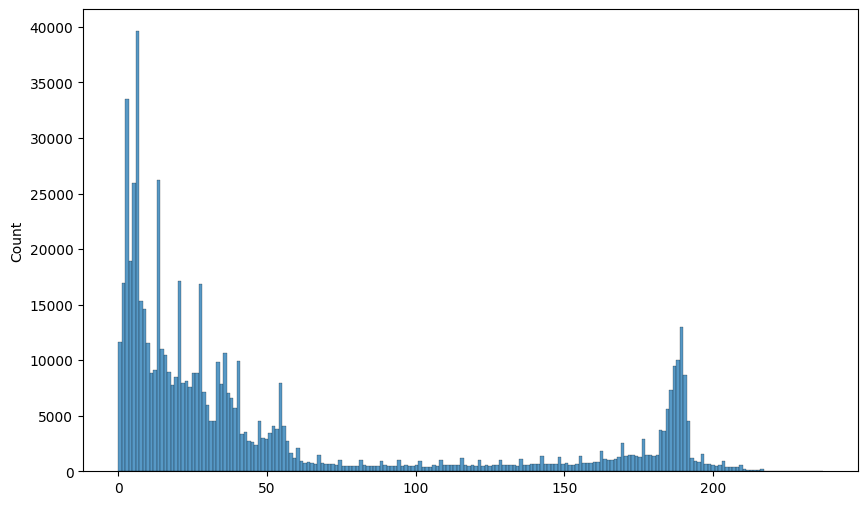

In [21]:
import seaborn as sns

ax = sns.histplot(imagem.flatten())

ax.figure.set_size_inches(10, 6)

In [22]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)
print(f'Limiar: {valor}')

Limiar: 96.0


In [23]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

, PLRSD97
a c AAA



In [24]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [25]:
erosao = cv2.erode(lim_otsu, kernel)
cv2_imshow(erosao)

In [26]:
dilatacao = cv2.dilate(lim_otsu, kernel)
cv2_imshow(dilatacao)


In [27]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
cv2_imshow(abertura)

In [28]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(fechamento)

In [29]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradiente)

In [30]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(cartola)

In [31]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

In [32]:
cartola = cv2.morphologyEx(imagem, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

In [33]:
chapeu_petro = cv2.morphologyEx(lim_otsu, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_petro)

In [34]:
chapeu_petro = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_petro)

In [35]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

, PLRSD97 |
— :” NS ss



In [36]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

In [37]:
contornos, heirarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos

(array([[[1069,  593]],
 
        [[1068,  594]],
 
        [[1057,  594]],
 
        [[1056,  595]],
 
        [[1045,  595]],
 
        [[1044,  596]],
 
        [[1018,  596]],
 
        [[1044,  596]],
 
        [[1045,  595]],
 
        [[1056,  595]],
 
        [[1057,  594]],
 
        [[1068,  594]],
 
        [[1069,  593]],
 
        [[1082,  593]]], dtype=int32),
 array([[[490, 571]],
 
        [[489, 572]],
 
        [[490, 571]],
 
        [[517, 571]],
 
        [[518, 572]],
 
        [[519, 572]],
 
        [[520, 571]],
 
        [[548, 571]],
 
        [[549, 572]],
 
        [[553, 572]],
 
        [[554, 571]],
 
        [[565, 571]],
 
        [[566, 572]],
 
        [[568, 572]],
 
        [[569, 571]],
 
        [[570, 572]],
 
        [[572, 572]],
 
        [[573, 571]],
 
        [[576, 571]],
 
        [[577, 572]],
 
        [[587, 572]],
 
        [[588, 571]],
 
        [[590, 571]],
 
        [[591, 572]],
 
        [[601, 572]],
 
        [[602, 571]],
 

In [38]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [39]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [40]:
x, y, w, h = cv2.boundingRect(localizacao)
x, y, w, h

(180, 168, 722, 224)

In [41]:
placa = imagem[y:y+h, x:x+w]
cv2_imshow(placa)

In [42]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4)))
cv2_imshow(erosao)

In [43]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
texto = pytesseract.image_to_string(erosao, lang="por", config=config_tesseract)
print(texto)

L PLR3D97



In [44]:
import re

texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido

<re.Match object; span=(2, 9), match='PLR3D97'>

In [45]:
print(texto_extraido.group(0))

PLR3D97


In [46]:
imagem = cv2.imread('imagens/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [47]:
cv2_imshow(imagem)

In [48]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

In [49]:
contornos, heirarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]

In [50]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [51]:
localizacao

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [52]:
x, y, w, h = cv2.boundingRect(localizacao)
x, y, w, h

(1259, 737, 401, 114)

In [53]:
placa = imagem[y:y+h, x:x+w]
cv2_imshow(placa)

In [54]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)

In [55]:
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

“POX4G21



In [56]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido.group(0))

POX4G21


In [57]:
imagem = cv2.imread('imagens/placa_carro3.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)

In [58]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
chapeu_petro = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_petro)

In [59]:
import numpy as np

sobel_x = cv2.Sobel(chapeu_petro, ddepth=cv2.CV_32F, dx = 1, dy = 0, ksize = 1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')
cv2_imshow(sobel_x)

In [60]:
sobel_x = cv2.GaussianBlur(sobel_x, (5, 5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_retangular)
cv2_imshow(sobel_x)
valor, limiarizacao = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(limiarizacao)

In [61]:
kernel_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado, iterations = 2)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations = 2)
cv2_imshow(limiarizacao)

In [62]:
fechamento = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel_quadrado)
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(mascara)


In [63]:
limiarizacao = cv2.bitwise_and(limiarizacao, limiarizacao, mask = mascara)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations = 2)
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado)
cv2_imshow(limiarizacao)

In [65]:
from skimage.segmentation import clear_border
limiarizacao = clear_border(limiarizacao)
cv2_imshow(limiarizacao)

In [68]:
contornos, hierarquia = cv2.findContours(limiarizacao, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key = cv2.contourArea, reverse = True)[:10]
contornos

[array([[[397, 195]],
 
        [[397, 197]],
 
        [[396, 198]],
 
        [[396, 202]],
 
        [[397, 203]],
 
        [[397, 255]],
 
        [[403, 255]],
 
        [[405, 253]],
 
        [[405, 252]],
 
        [[406, 251]],
 
        [[446, 251]],
 
        [[448, 253]],
 
        [[450, 253]],
 
        [[450, 249]],
 
        [[451, 248]],
 
        [[453, 248]],
 
        [[454, 249]],
 
        [[454, 253]],
 
        [[458, 253]],
 
        [[460, 251]],
 
        [[463, 251]],
 
        [[463, 248]],
 
        [[464, 247]],
 
        [[534, 247]],
 
        [[535, 248]],
 
        [[535, 252]],
 
        [[537, 252]],
 
        [[538, 253]],
 
        [[540, 253]],
 
        [[540, 242]],
 
        [[541, 241]],
 
        [[543, 241]],
 
        [[544, 242]],
 
        [[544, 247]],
 
        [[545, 248]],
 
        [[545, 253]],
 
        [[548, 253]],
 
        [[549, 252]],
 
        [[549, 251]],
 
        [[550, 250]],
 
        [[550, 248]],
 
        [[551, 2

In [70]:
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    proporcao = float(w) / h
    if proporcao >= 3 and proporcao < 3.5:
        placa = imagem[y:y+h, x:x+w]
        valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        regiao_interesse = clear_border(regiao_interesse)
        cv2_imshow(placa)
        cv2_imshow(regiao_interesse)

In [71]:
texto = pytesseract.image_to_string(regiao_interesse, lang='por', config=config_tesseract)
print(texto)

.BDM3D69



In [72]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido

<re.Match object; span=(1, 8), match='BDM3D69'>

In [73]:
print(texto_extraido.group(0))

BDM3D69
